### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_walk(steps, p, path = False):
    """Negative numbers is defined as taking a left and positive number is right
    
    Returns the path history if prompted"""
    
    #Starting position
    position = 0
    
    #data_store
    data = [0]
    
    #loop over each step
    for step in range(steps):
        
        #Move to the right
        if np.random.random() > 0.4:
            position += 1
            
        #move to the left
        else:
            position += -1
        
        data.append(position)
        
    #Return full path
    if path:
        return data
    
    #return only last position
    else:
        return data[-1]

In [3]:
#parameters
steps = 30
p = 0.6
trails = 20000


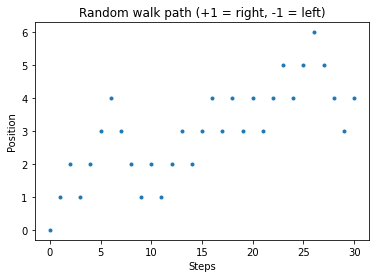

In [4]:
#a)

np.random.seed(3)

path_data = random_walk(steps, p, path = True)

plt.scatter(range(len(path_data)), path_data, marker = '.')
plt.xlabel("Steps")
plt.ylabel("Position")
plt.title("Random walk path (+1 = right, -1 = left)")
plt.show()

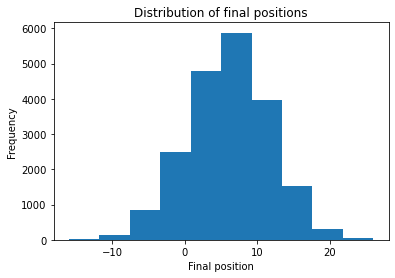

In [5]:
#b)

#store data
data = []


#loop for each trail
for trail in range(trails):
    
    data.append(random_walk(steps, p))
    
plt.hist(data)
plt.xlabel("Final position")
plt.ylabel("Frequency")
plt.title("Distribution of final positions")
plt.show()

In [6]:
#c and d
data = np.array(data)
print(f"Sample mean = {data.mean()}")
print(f"Sample Variance = {data.std()**2}")
print(f"95% confidence interval: {data.mean() - 1.96*data.std()} to {data.mean() + 1.96*data.std()}")

Sample mean = 6.0321
Sample Variance = 28.71836959
95% confidence interval: -4.471446478068442 to 16.535646478068443


The sample variance is expected to be very large since the bias (probability of right vs left) is very large. The variance and standard deviation will remain the same as we increase the sample size, but the standard error will decrease

### Part 2

In [7]:
def gamble(gambler, bank, max_interations):
    """This function computes the number of iteration until bank or gamber reaches bankruptcy"""
    
    #number of iterations
    i = 0
    
    gambler = gambler
    
    #while neither the bank of the gambler is bankrupt and before the max iteration
    while gambler > 0 and gambler < (bank + gambler) and i < max_interations:
        
        
        #if gambler wins
        if np.random.random() > 0.5:
            gambler += 1
            
        #if gambler looose
        else:
            gambler += -1
            
        i += 1
    
    return i



In [10]:
trails = 10
upper_bounds = [100, 1000, 10000, 100000, 1000000, 10000000]
varience = []
mean = []

for upper_bound in upper_bounds:
    sample_data = []
    
    for trail in range(trails):
        sample_data.append(gamble(100, 2000, upper_bound))
    
    varience.append(np.array(sample_data).std()**2)
    mean.append(np.array(sample_data).mean())

for i in range(len(upper_bounds)):
    print(f"Variance for upper_bound: {upper_bounds[i]} is: {round(varience[i], 2)} and mean: {mean[i]}")



Variance for upper_bound: 100 is: 0.0 and mean: 100.0
Variance for upper_bound: 1000 is: 0.0 and mean: 1000.0
Variance for upper_bound: 10000 is: 6649581.44 and mean: 8606.4
Variance for upper_bound: 100000 is: 1983571347.04 and mean: 63769.6
Variance for upper_bound: 1000000 is: 113821441798.6 and mean: 251861.0
Variance for upper_bound: 10000000 is: 420906306655.36 and mean: 275812.8
